## Классификация Наивным Байесовским классификатором (Naive Bayes)

Наивный байесовский классификатор - это простой вероятностный алгоритм машинного обучения, который используется для решения задач классификации. Он основан на байесовском подходе к статистике и предполагает "наивное" предположение о независимости признаков.

Принцип работы наивного байесовского классификатора основан на оценке апостериорной вероятности класса на основе вероятностей признаков. Алгоритм тренируется на маркированных обучающих данных, состоящих из набора признаков и соответствующих им меток классов. Затем, на основе этих данных, строятся условные вероятности признаков для каждого класса.

Одним из преимуществ наивного байесовского классификатора является его относительная простота и скорость работы, особенно на больших объемах данных. Однако, его недостатком является его "наивное" предположение о независимости признаков, что может не всегда соответствовать реальности данных. Если признаки действительно зависимы, то наивный байесовский классификатор может давать неточные результаты. Также, наивный байесовский классификатор может иметь ограниченные возможности в моделировании сложных взаимосвязей между признаками.

Тем не менее, наивный байесовский классификатор широко используется в ряде задач, таких как классификация текстов, спам-фильтрация, определение тональности текста, медицинская диагностика и других областях, где его простота и относительно хорошая производительность могут быть полезными. Он также может быть использован в качестве базового алгоритма в ансамблевых методах, таких как наивный байесовский баггинг или наивный байесовский стекинг, для улучшения точности классификации.

Алгоритм основан на понятии условной вероятности (наступление события A при условии наступления события B):

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

где $P(A), P(B)$ - полные вероятности наступления события A и B, $P(B|A)$ - вероятность наступления события B при истинности гипотезы A

Допустим, у нас есть набор данных о погоде, содержащий информацию о 
температуре: 
* высокая (3)
* средняя (2), 
* низкая (1), 

влажности:
* высокая (3)
* средняя (2), 
* низкая (1) 

и ветре: 
* сильный (2)
* слабый (1). 

Используя этот набор данных, мы хотим построить наивный байесовский классификатор для прогнозирования, будет ли завтра солнечный день ("Yes") - 1 или дождливый день ("No") - 0.


#### Простой пример

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder

# Создаем обучающий набор данных 
# (температура / влажность / ветер)
X = np.array([
        [3, 3, 1],
        [3, 3, 2],
        [2, 3, 1],
        [1, 2, 1],
        [1, 1, 1],
        [1, 1, 2],
        [2, 1, 2],
        [3, 2, 1],
        [3, 1, 1],
        [1, 2, 1],
        [3, 2, 2],
        [2, 3, 2],
        [2, 2, 1],
        [1, 3, 2]
])

y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

# Создаем наивный байесовский классификатор (Гауссовский)
clf = GaussianNB()

# Обучаем классификатор на обучающих данных
clf.fit(X, y)

# Предсказываем класс для нового наблюдения
new_observation = np.array([2, 3, 1])
predicted_class = clf.predict([new_observation])
print(f"Завтра : {predicted_class}", )

Завтра : [1]


### Рассмотрим на реальном наборе данных


In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("loan_train.csv")
dt = pd.read_csv("loan_test.csv") #тестовый набор не содержит целевой переменной!

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [3]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


In [4]:
#
# ради примера не будем заморачиваться с пропущенными данными ;)
#
dfn = df.dropna()
dfn.reset_index(inplace = True, drop = True)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 46.9+ KB


In [227]:
dfn.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,0.070489,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.054830,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.035250,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.030093,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.072356,0.0,14100000,360.0,1.0,Urban,Y


In [228]:
#
# Просмотр категориальных значений
#
#dfn.Gender.value_counts()
#dfn.Married.value_counts()
#dfn.Dependents.value_counts()
#dfn.Education.value_counts()
#dfn.Self_Employed.value_counts()
#dfn.Area.value_counts()

In [5]:

# кодирование пола в виде бинарного признака OneHot вместо числовой категории
gendEnc = OneHotEncoder( sparse = False )
gendCol = gendEnc.fit_transform( dfn.Gender.to_numpy().reshape(-1,1) )
gendCols = pd.DataFrame( gendCol, columns = gendEnc.categories_ )

#кодирование семейного статуса
marrEnc = OneHotEncoder( sparse = False )
marrCol = marrEnc.fit_transform( dfn.Married.to_numpy().reshape(-1,1) )
marrCols = pd.DataFrame( marrCol, columns = list(np.array([["married_","married_"]]) + marrEnc.categories_) )

# Оставим категории в количественном типе (кол-во иждивенцев: 0,1,2,3(3+))
depEnc = LabelEncoder()
depCol = depEnc.fit_transform(dfn.Dependents)
depCols = pd.DataFrame( depCol, columns = [dfn.Dependents.name] )

#кодирование уровня образования
eduEnc = OneHotEncoder( sparse = False )
eduCol = eduEnc.fit_transform( dfn.Education.to_numpy().reshape(-1,1) )
eduCols = pd.DataFrame(eduCol, columns = eduEnc.categories_)

#кодирование статуса самозанятости
semplEnc = OneHotEncoder( sparse = False )
semplCol = semplEnc.fit_transform( dfn.Self_Employed.to_numpy().reshape(-1,1) )
semplCols = pd.DataFrame( semplCol, columns = list(np.array([["SelfEmpl_", "SelfEmpl_"]]) + semplEnc.categories_) )

#кодирование района проживания Город/Пригород/Сельская местность
areaEnc = OneHotEncoder( sparse = False )
areaCol = areaEnc.fit_transform( dfn.Area.to_numpy().reshape(-1,1) )
areaCols = pd.DataFrame( areaCol, columns = areaEnc.categories_)

#кодирование переменной "статус"
#statEnc = OneHotEncoder( sparse = False )
statEnc = LabelEncoder() #statEnc.classes_ = array(['N', 'Y']) - N - 0, Y - 1
statCol = statEnc.fit_transform( dfn.Status ) 
statCols = pd.DataFrame( statCol, columns = [dfn.Status.name] )


In [6]:
#
# масштабирование этих полей увеличило точность модели наивного Байеса на тестовой выборке более чем на 15%
#
scaled = dfn[["Applicant_Income", "Coapplicant_Income", "Loan_Amount", "Term"]]
scaled = ( scaled - scaled.min() ) / ( scaled.max() - scaled.min() )

In [119]:
newDf = pd.concat([gendCols, marrCols, depCols, eduCols, semplCols, scaled, 
                   dfn.Credit_History, areaCols, statCols], axis = 1)
newDf.head()

,"(Female,)","(Male,)","(married_No,)","(married_Yes,)",Dependents,"(Graduate,)","(Not Graduate,)","(SelfEmpl_No,)","(SelfEmpl_Yes,)",Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,"(Rural,)","(Semiurban,)","(Urban,)",Status
0,0.0,1.0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.070489,0.000000,0.250000,0.72973,1.0,0.0,0.0,1.0,1
1,0.0,1.0,0.0,1.0,1,1.0,0.0,1.0,0.0,0.054830,0.044567,0.213333,0.72973,1.0,1.0,0.0,0.0,0
2,0.0,1.0,0.0,1.0,0,1.0,0.0,0.0,1.0,0.035250,0.000000,0.110000,0.72973,1.0,0.0,0.0,1.0,1
3,0.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,0.030093,0.069687,0.200000,0.72973,1.0,0.0,0.0,1.0,1
4,0.0,1.0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.072356,0.000000,0.235000,0.72973,1.0,0.0,0.0,1.0,1


<AxesSubplot:>

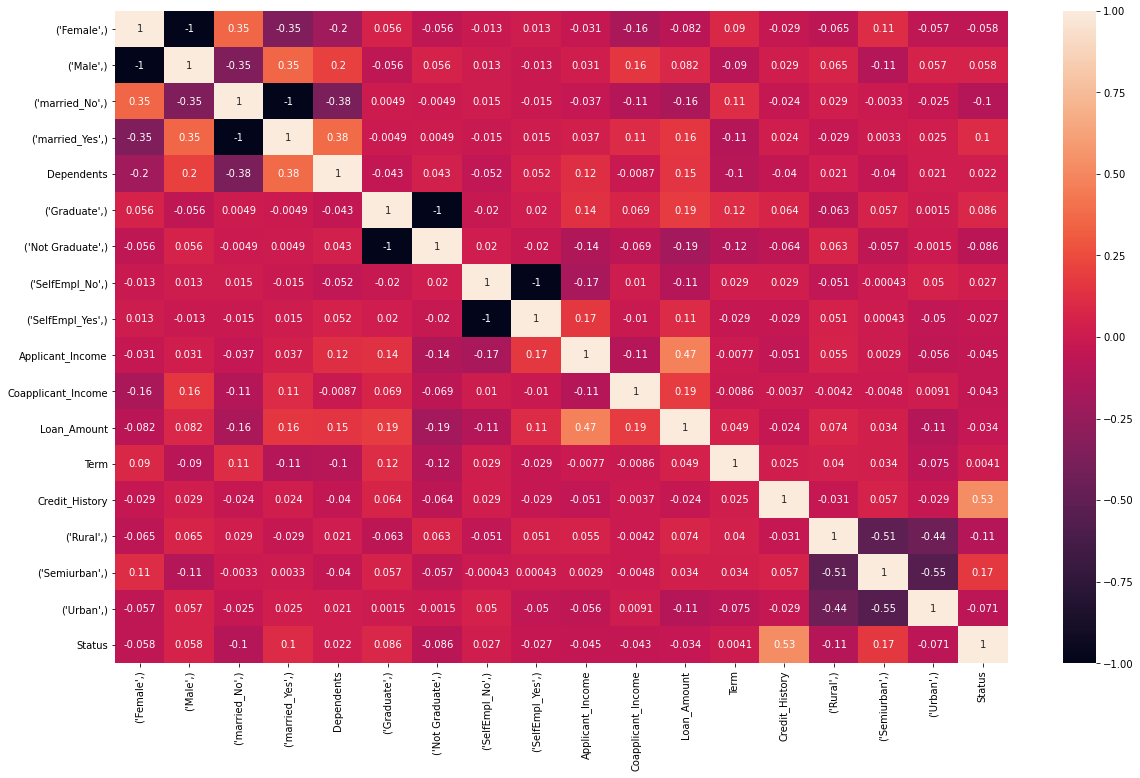

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure( figsize = (20, 12) )
sns.heatmap( newDf.corr(), annot = True)

In [121]:
from sklearn.model_selection import train_test_split
X =  np.array( newDf.iloc[:,:-1] )#.reshape(-1,11)
Y =  np.array( newDf.iloc[:,-1] )#.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [122]:
nb = GaussianNB()
#nb = MultinomialNB()
#nb = ComplementNB()
#nb = BernoulliNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.7844311377245509
TEST ACCURACY : 0.793939393939394


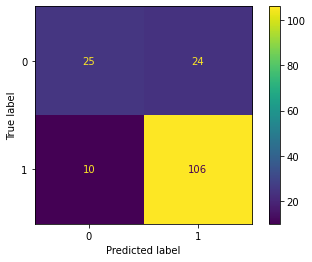

In [124]:
import matplotlib.pyplot as plt
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

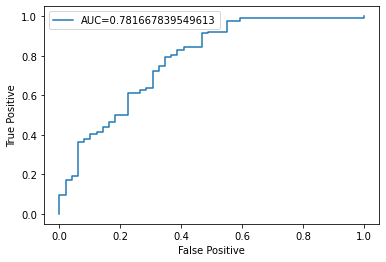

In [125]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

<hr>

## Классификация с помощью дерева решений (DecisionTreeClassifier)

Дерево решений представляет собой модель, реализующую получение целевой переменной по значениям предикторов на основе цепочки рассуждений о значениях предикторов.


Основные параметры класса **sklearn.tree.DecisionTreeClassifier**:

* max_depth – максимальная глубина дерева
* max_features - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
* min_samples_leaf – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации, про нее чуть ниже.

**Преимущества деревьев решений:**

* Простота интерпретации. Деревья можно визуализировать.
* Требуется небольшая подготовка данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений.
* Вычислительная сложность использования дерева (прогнозирования) является логарифмической по количеству точек данных.
* Может обрабатывать как числовые, так и категориальные данные. **Однако реализация scikit-learn пока не поддерживает категориальные переменные.**
* Способен работать с несколькими выходами.
* Использует модель белого ящика. Если данная ситуация наблюдаема в модели, объяснение условия легко объяснить с помощью булевой логики. 


**Недостатки деревьев решений:**

* Процесс обучения может создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка (минимальное количество выборок конечного узла или установка максимальной глубины дерева).
* Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается за счет использования деревьев решений в ансамбле.
* Предсказания деревьев решений не являются ни гладкими, ни непрерывными, а являются кусочно-постоянными приближениями. Следовательно, они не годятся для экстраполяции.
* Процедура обучения дерева решений может порождать предвзятые деревья при доминировании некоторых классов. Поэтому рекомендуется сбалансировать набор данных перед обучением.

In [126]:
#
# для дерева решений не будем использовать нормализацию
#

treeDf = pd.concat([gendCols, marrCols, depCols, eduCols, semplCols, 
                    dfn.Applicant_Income, dfn.Coapplicant_Income, dfn.Loan_Amount, dfn.Term, 
                   dfn.Credit_History, areaCols, statCols], axis = 1)
treeDf.head()

,"(Female,)","(Male,)","(married_No,)","(married_Yes,)",Dependents,"(Graduate,)","(Not Graduate,)","(SelfEmpl_No,)","(SelfEmpl_Yes,)",Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,"(Rural,)","(Semiurban,)","(Urban,)",Status
0,0.0,1.0,1.0,0.0,0,1.0,0.0,1.0,0.0,584900,0.0,15000000,360.0,1.0,0.0,0.0,1.0,1
1,0.0,1.0,0.0,1.0,1,1.0,0.0,1.0,0.0,458300,150800.0,12800000,360.0,1.0,1.0,0.0,0.0,0
2,0.0,1.0,0.0,1.0,0,1.0,0.0,0.0,1.0,300000,0.0,6600000,360.0,1.0,0.0,0.0,1.0,1
3,0.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,258300,235800.0,12000000,360.0,1.0,0.0,0.0,1.0,1
4,0.0,1.0,1.0,0.0,0,1.0,0.0,1.0,0.0,600000,0.0,14100000,360.0,1.0,0.0,0.0,1.0,1


In [127]:
X =  np.array( treeDf.iloc[:,:-1] )#.reshape(-1,11)
Y =  np.array( treeDf.iloc[:,-1] )#.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [128]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier( criterion = "gini", random_state = 43, min_samples_split = 8, min_samples_leaf = 1 )

# criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
# splitter {“best”, “random”}, default=”best”
# max_depth int, default=None
# min_samples_split int or float, default=2
# min_samples_leaf int or float, default=1

clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)[:,1]

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('TRAIN ACCURACY :', accuracy_score( y_train_predict, y_train ))
print('TEST ACCURACY :', accuracy_score( y_test_predict, y_test ))

TRAIN ACCURACY : 0.9131736526946108
TEST ACCURACY : 0.7151515151515152


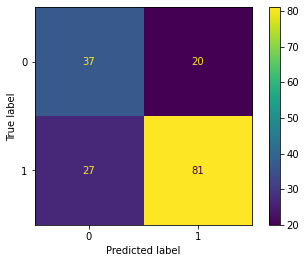

In [130]:
import matplotlib.pyplot as plt

confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

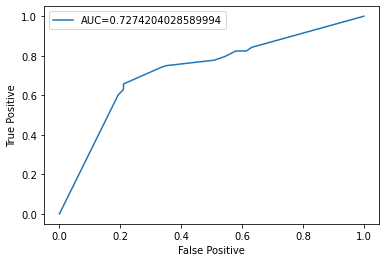

In [131]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()

### Визуализация деревьев

#### Текстовая визуализация

In [132]:
from sklearn import tree

textDescr = tree.export_text(clf, feature_names = list(treeDf.columns[:-1]) )
print(textDescr)

|--- Credit_History <= 0.50
|   |--- Coapplicant_Income <= 669800.00
|   |   |--- Dependents <= 2.50
|   |   |   |--- ('Urban',) <= 0.50
|   |   |   |   |--- Applicant_Income <= 566500.00
|   |   |   |   |   |--- Applicant_Income <= 465850.00
|   |   |   |   |   |   |--- Loan_Amount <= 9400000.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Loan_Amount >  9400000.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Applicant_Income >  465850.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Applicant_Income >  566500.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- ('Urban',) >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Dependents >  2.50
|   |   |   |--- class: 0
|   |--- Coapplicant_Income >  669800.00
|   |   |--- class: 0
|--- Credit_History >  0.50
|   |--- Loan_Amount <= 45800000.00
|   |   |--- Coapplicant_Income <= 748000.00
|   |   |   |--- Coapplicant_Income <= 76800.00
|   |   |   |   |--- Applicant_Income <= 

#### Графическая визуализация

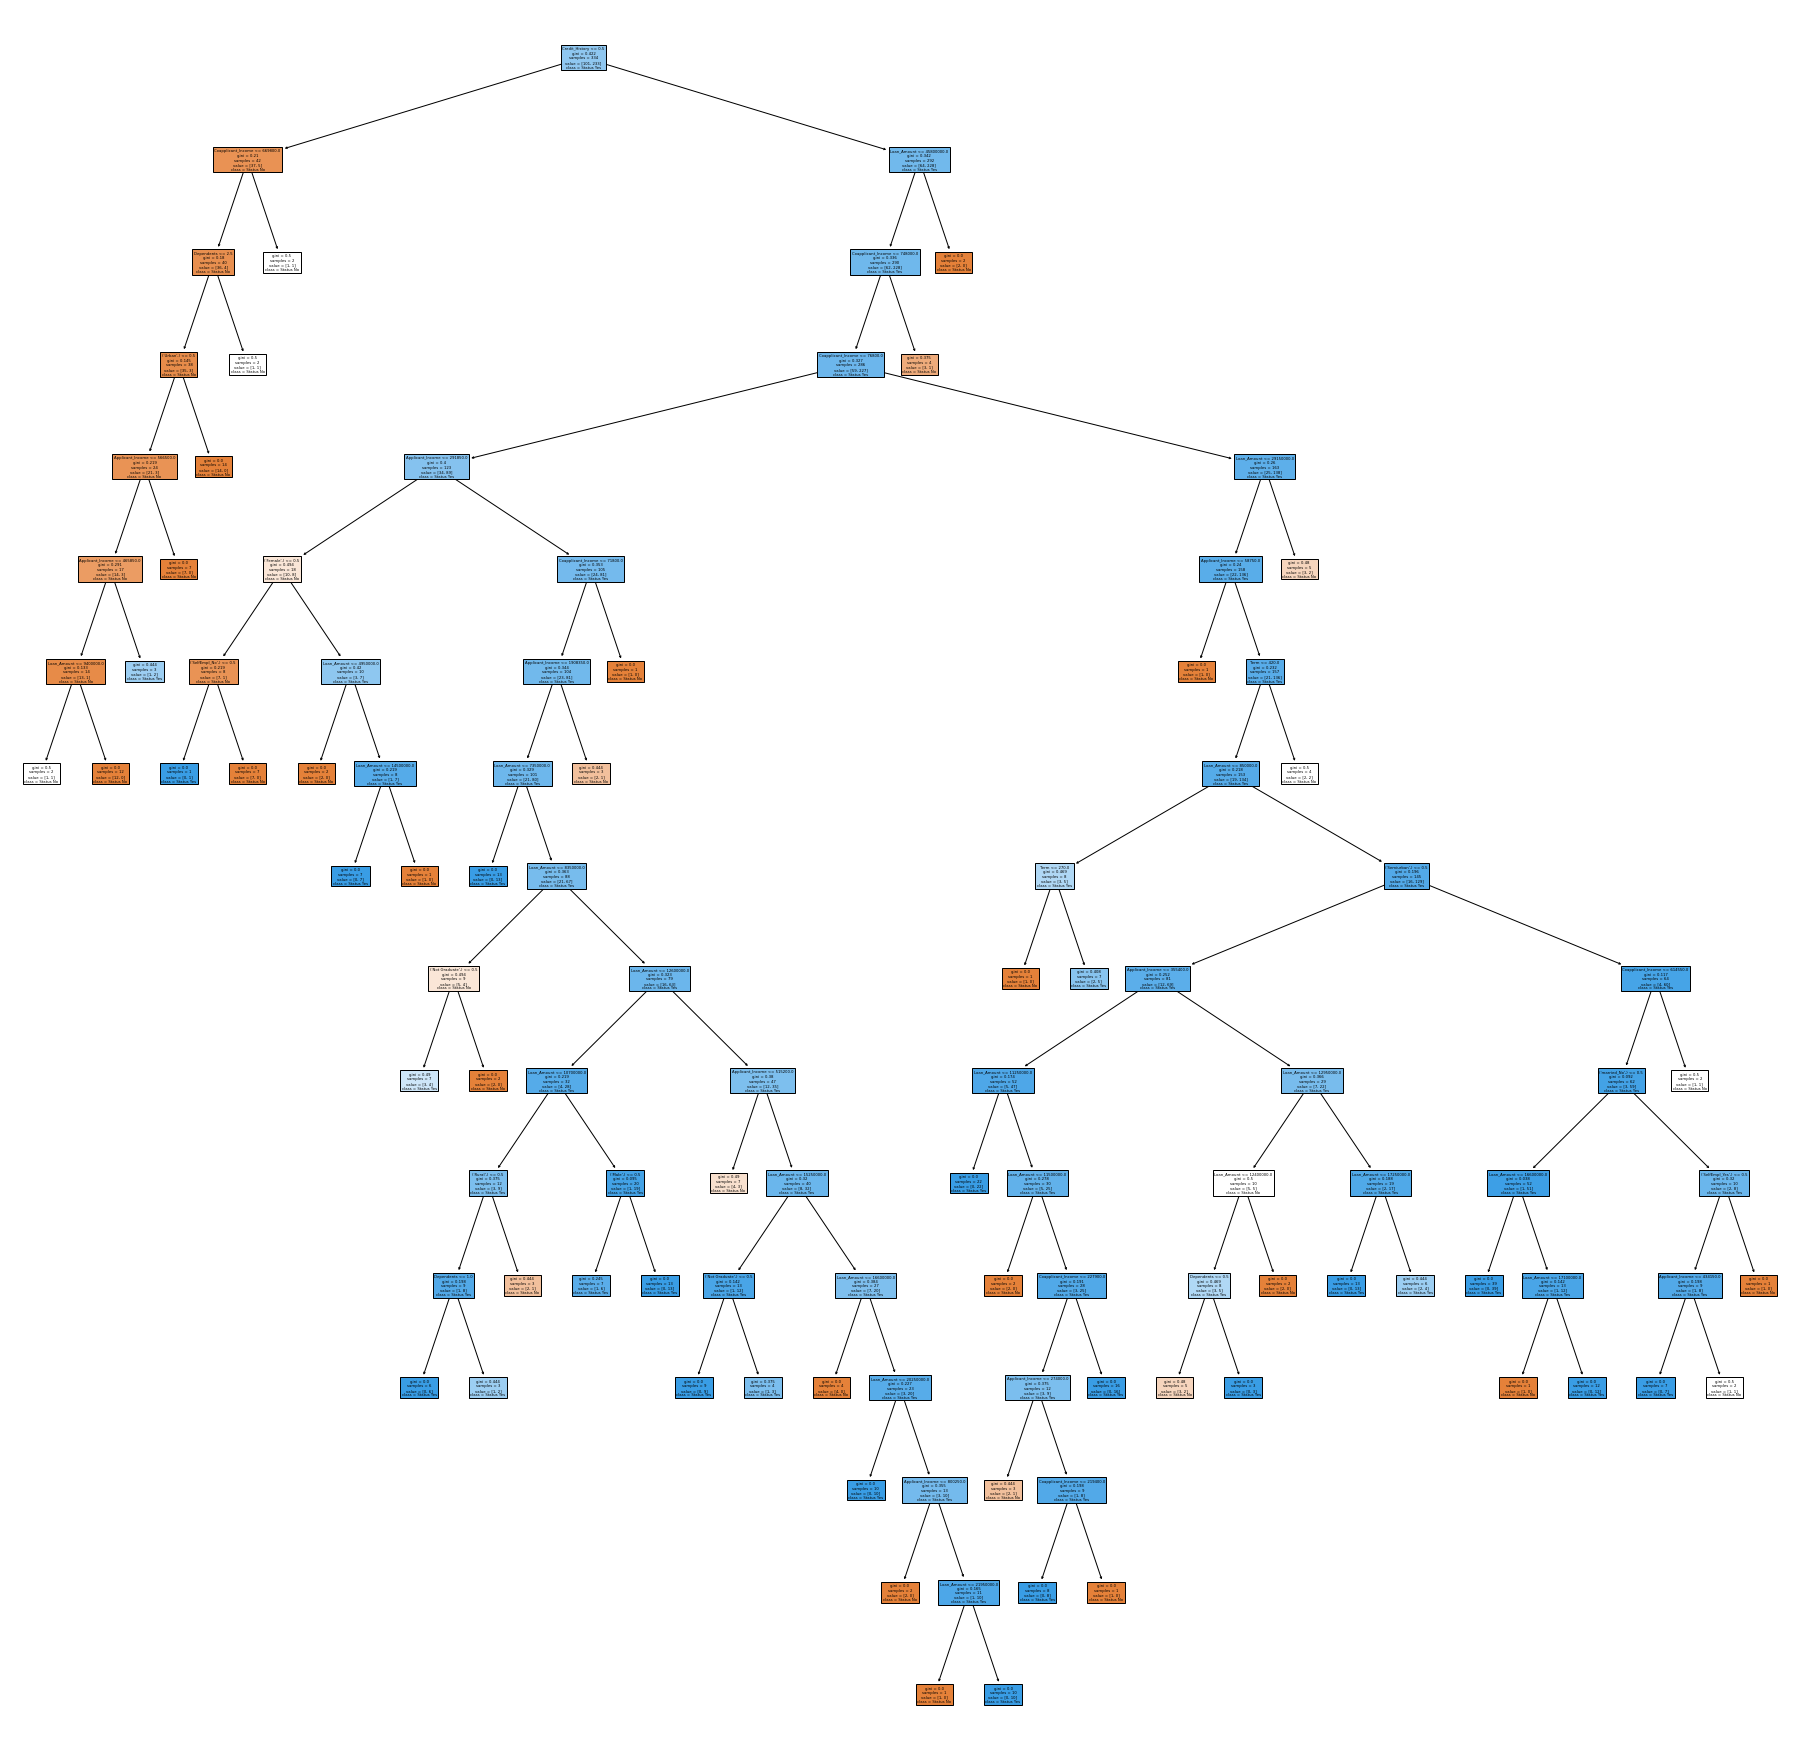

In [133]:
fig = plt.figure(figsize=(32,32))
res = tree.plot_tree(clf, 
                   feature_names = list(treeDf.columns[:-1]) ,  
                   class_names = ["Status No", "Status Yes"],
                   filled = True)

<hr>

## Кросс-валидация

На прошлых занятиях рассматривался подход к проверке модели на так называемой "тестовой выборке" - некоторой части исходного набора данных, не пересекающийся с обучающим набором.

Для независимых наблюдений хорошей практикой считается выбор случайных наблюдений (объектов) или их перемешивание перед выборкой.

При этом можно наблюдать различные показатели качества обучения модели на одном и том же исходном наборе данных, но при формировании различных разбиений на обучающую и тестовую выборку.

На одном обучающем наборе также легко получить переобученную модель  

Существует ли какой-то подход учесть эти различия при валидации модели?



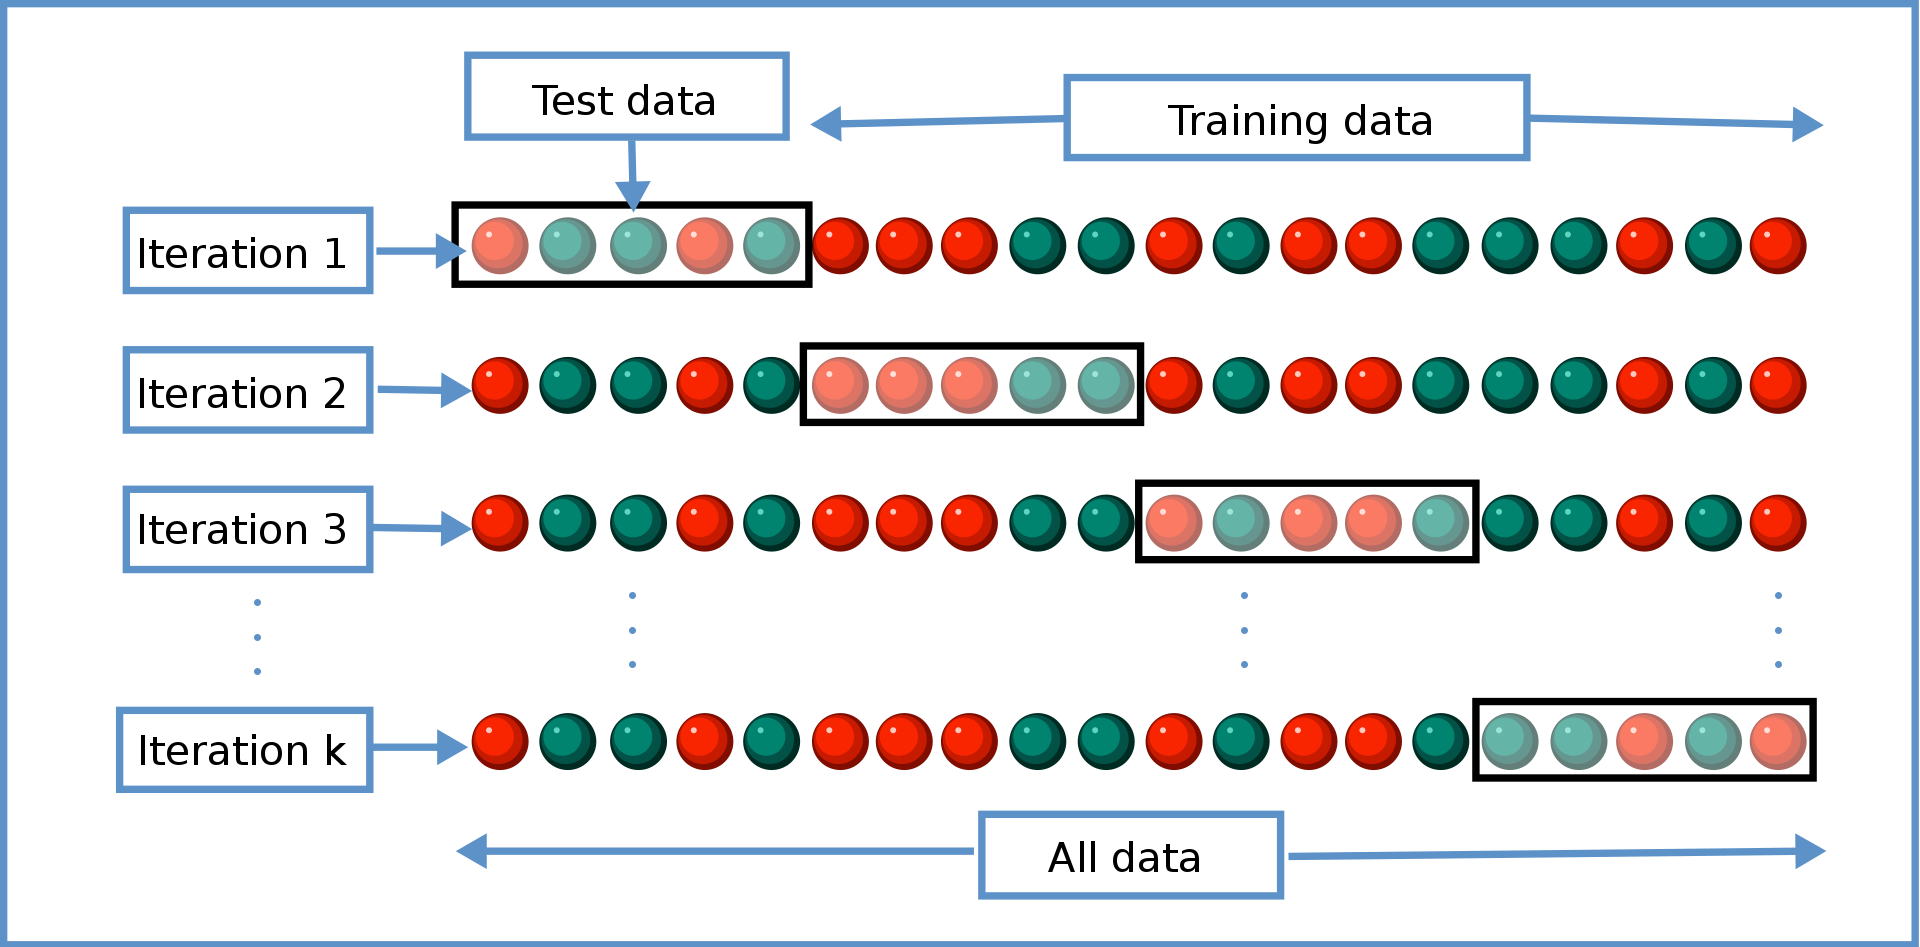

Существует несколько различных методов кросс-валидации, включая:

* Метод K-блочной кросс-валидации (K-fold cross-validation): Данные разделяются на K равных подмножеств (называемых "складками" или "фолдами"). Затем модель обучается на K-1 складке и тестируется на оставшейся одной складке. Этот процесс выполняется K раз, с каждой складкой использовавшейся в качестве тестового набора один раз. В результате получается K независимых оценок производительности модели, которые могут быть усреднены для получения итоговой оценки.


* Стратифицированная K-блочная кросс-валидация (Stratified K-fold cross-validation): Этот метод аналогичен K-блочной кросс-валидации, однако при разделении данных на складки сохраняется пропорция классов (или других релевантных признаков) в каждой складке, что особенно полезно для несбалансированных данных.


* Оставить одну выборку (Leave-One-Out, LOO): В этом методе каждый объект данных используется в качестве тестового набора один раз, а остальные объекты - для обучения модели. Этот метод особенно полезен, когда у вас очень ограниченное количество данных, однако он может быть вычислительно затратным, так как требует обучения модели на большом количестве раз.


* Групповая кросс-валидация (Group K-fold cross-validation): Этот метод используется, когда данные содержат группы объектов, которые необходимо сохранить вместе в одной складке, чтобы избежать утечек информации между обучающим и тестовым наборами данных. Примером может служить задача прогнозирования цен на недвижимость, где группами могут быть географические районы, и объекты недвижимости из одного района необходимо оставить вместе.

Кросс-валидация выполняется функцией **cross_val_score()**

Основыные ее параметры:

* estimator - объект классификатора или регрессора (LogisticRegression, DecisionTreeClassifier, ...)
* X, y - предикторы и целевые значения соответственно
* cv - объект, реализующий конкретный метод кросс-валидации (по умолчанию - 5-блочная KFold) 
* scoring - можно указать интересующую метрику (по умолчанию использется метрика используемой модели, например, *accuracy* для задачи классификации как доля правильно классифицированных меток)

Больше информации по метрикам: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Если *estimator* является классификатором, и *y* представляет различные классы (в т.ч. бинарные), то в качестве *cv* по умолчанию используется **StratifiedKFold**

Полная документация: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, iris.data, iris.target)

print(scores)
print(f"В среднем точность классификации моделью: {scores.mean()} со средним разбросом {scores.std()}")


[0.96666667 0.96666667 0.9        1.         1.        ]
В среднем точность классификации моделью: 0.9666666666666668 со средним разбросом 0.036514837167011066


#### Метод K-блочной кросс-валидации:

In [13]:
#################################
## Игнорировать FutureWarning
#################################
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)


from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Создаем объект KFold с числом блоков K=5
kFold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Создаем модель для классификации
knn = KNeighborsClassifier(n_neighbors = 5)

# Выполняем кросс-валидацию
scores = cross_val_score(knn, iris.data, iris.target, cv = kFold)

# Выводим оценки производительности модели на каждой складке
print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [1.         1.         0.96666667 0.93333333 0.96666667]
Средняя оценка качества прогнозирования модели: 0.9733333333333334, средний разброс значений: 0.024944382578492935


#### Стратифицированная K-блочная кросс-валидация:

В стратифицированной перекрестной проверке данные разбиваются таким образом, чтобы пропорции классов в каждом блоке в точности соответствовали пропорциям классов в наборе данных.

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Создаем объект StratifiedKFold с числом блоков K=5
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle = True)

# Создаем модель для классификации
lr = LogisticRegression(multi_class = "ovr")

# Выполняем стратифицированную кросс-валидацию
scores = cross_val_score(lr, iris.data, iris.target, cv = stratifiedKfold)

print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [0.86666667 0.96666667 0.9        0.96666667 0.93333333]
Средняя оценка качества прогнозирования модели: 0.9266666666666667, средний разброс значений: 0.038873012632301994


#### Leave-One-Out (LOO)

Еще один часто используемый метод перекрестной проверки – исключение по одному (leave-one-out). Перекрестную проверку с исключением по одному можно представить в виде k-блочной перекрестной проверки, в которой каждый блок представляет собой отдельный пример. 

По каждому разбиению вы выбираете одну точку данных в качестве тестового набора. Этот вид проверки может занимать
очень много времени, особенно при работе с большими наборами данных, однако иногда позволяет получить более точные оценки на небольших наборах данных:


In [28]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
dtc = DecisionTreeClassifier()

scores = cross_val_score(dtc, iris.data, iris.target, cv = loo, n_jobs = -1)

#print(f"Оценки производительности модели на каждом блоке: {scores}")
print(f"Количество блоков: {len(scores)}")
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Количество блоков: 150
Средняя оценка качества прогнозирования модели: 0.9466666666666667, средний разброс значений: 0.22469732728470287


#### Групповая кросс-валидация:

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression

# Создаем объект GroupKFold с числом блоков K=5
group_kfold = GroupKFold(n_splits=5)

# Создаем модель для регрессии, например, линейную регрессию
model = LinearRegression()

# Выполняем групповую кросс-валидацию
scores = cross_val_score(model, X, y, groups=groups, cv=group_kfold)

# Выводим оценки производительности модели на каждой складке
print("Оценки производительности модели на каждой складке:", scores)
# Выводим среднюю оценку производительности модели
print("Средняя оценка производительности модели:",